In [1]:
# In this notebook:

# Practice Kmeans via wine dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

red['type'] = 1
white['type'] = 0
wines = red.append(white, ignore_index=True)

print (f'Wines dimensions: {wines.shape}')

wines.head(2)

Wines dimensions: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [4]:
wines.type.value_counts() # we see white-to-red ratio is 3-to-1

0    4898
1    1599
Name: type, dtype: int64

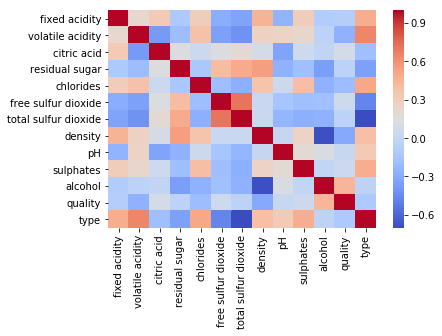

In [5]:
corr = wines.corr()
sns.heatmap(corr, cmap='coolwarm')

plt.show()

In [47]:
wpair = wines.drop(['quality','type'], axis=1)
wpair = StandardScaler().fit_transform(wpair)
wpair = pd.DataFrame(data = wpair, columns = list(wines.columns[:-2]))
wpair = pd.concat([wpair, wines['type']], axis=1)

wpair.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1


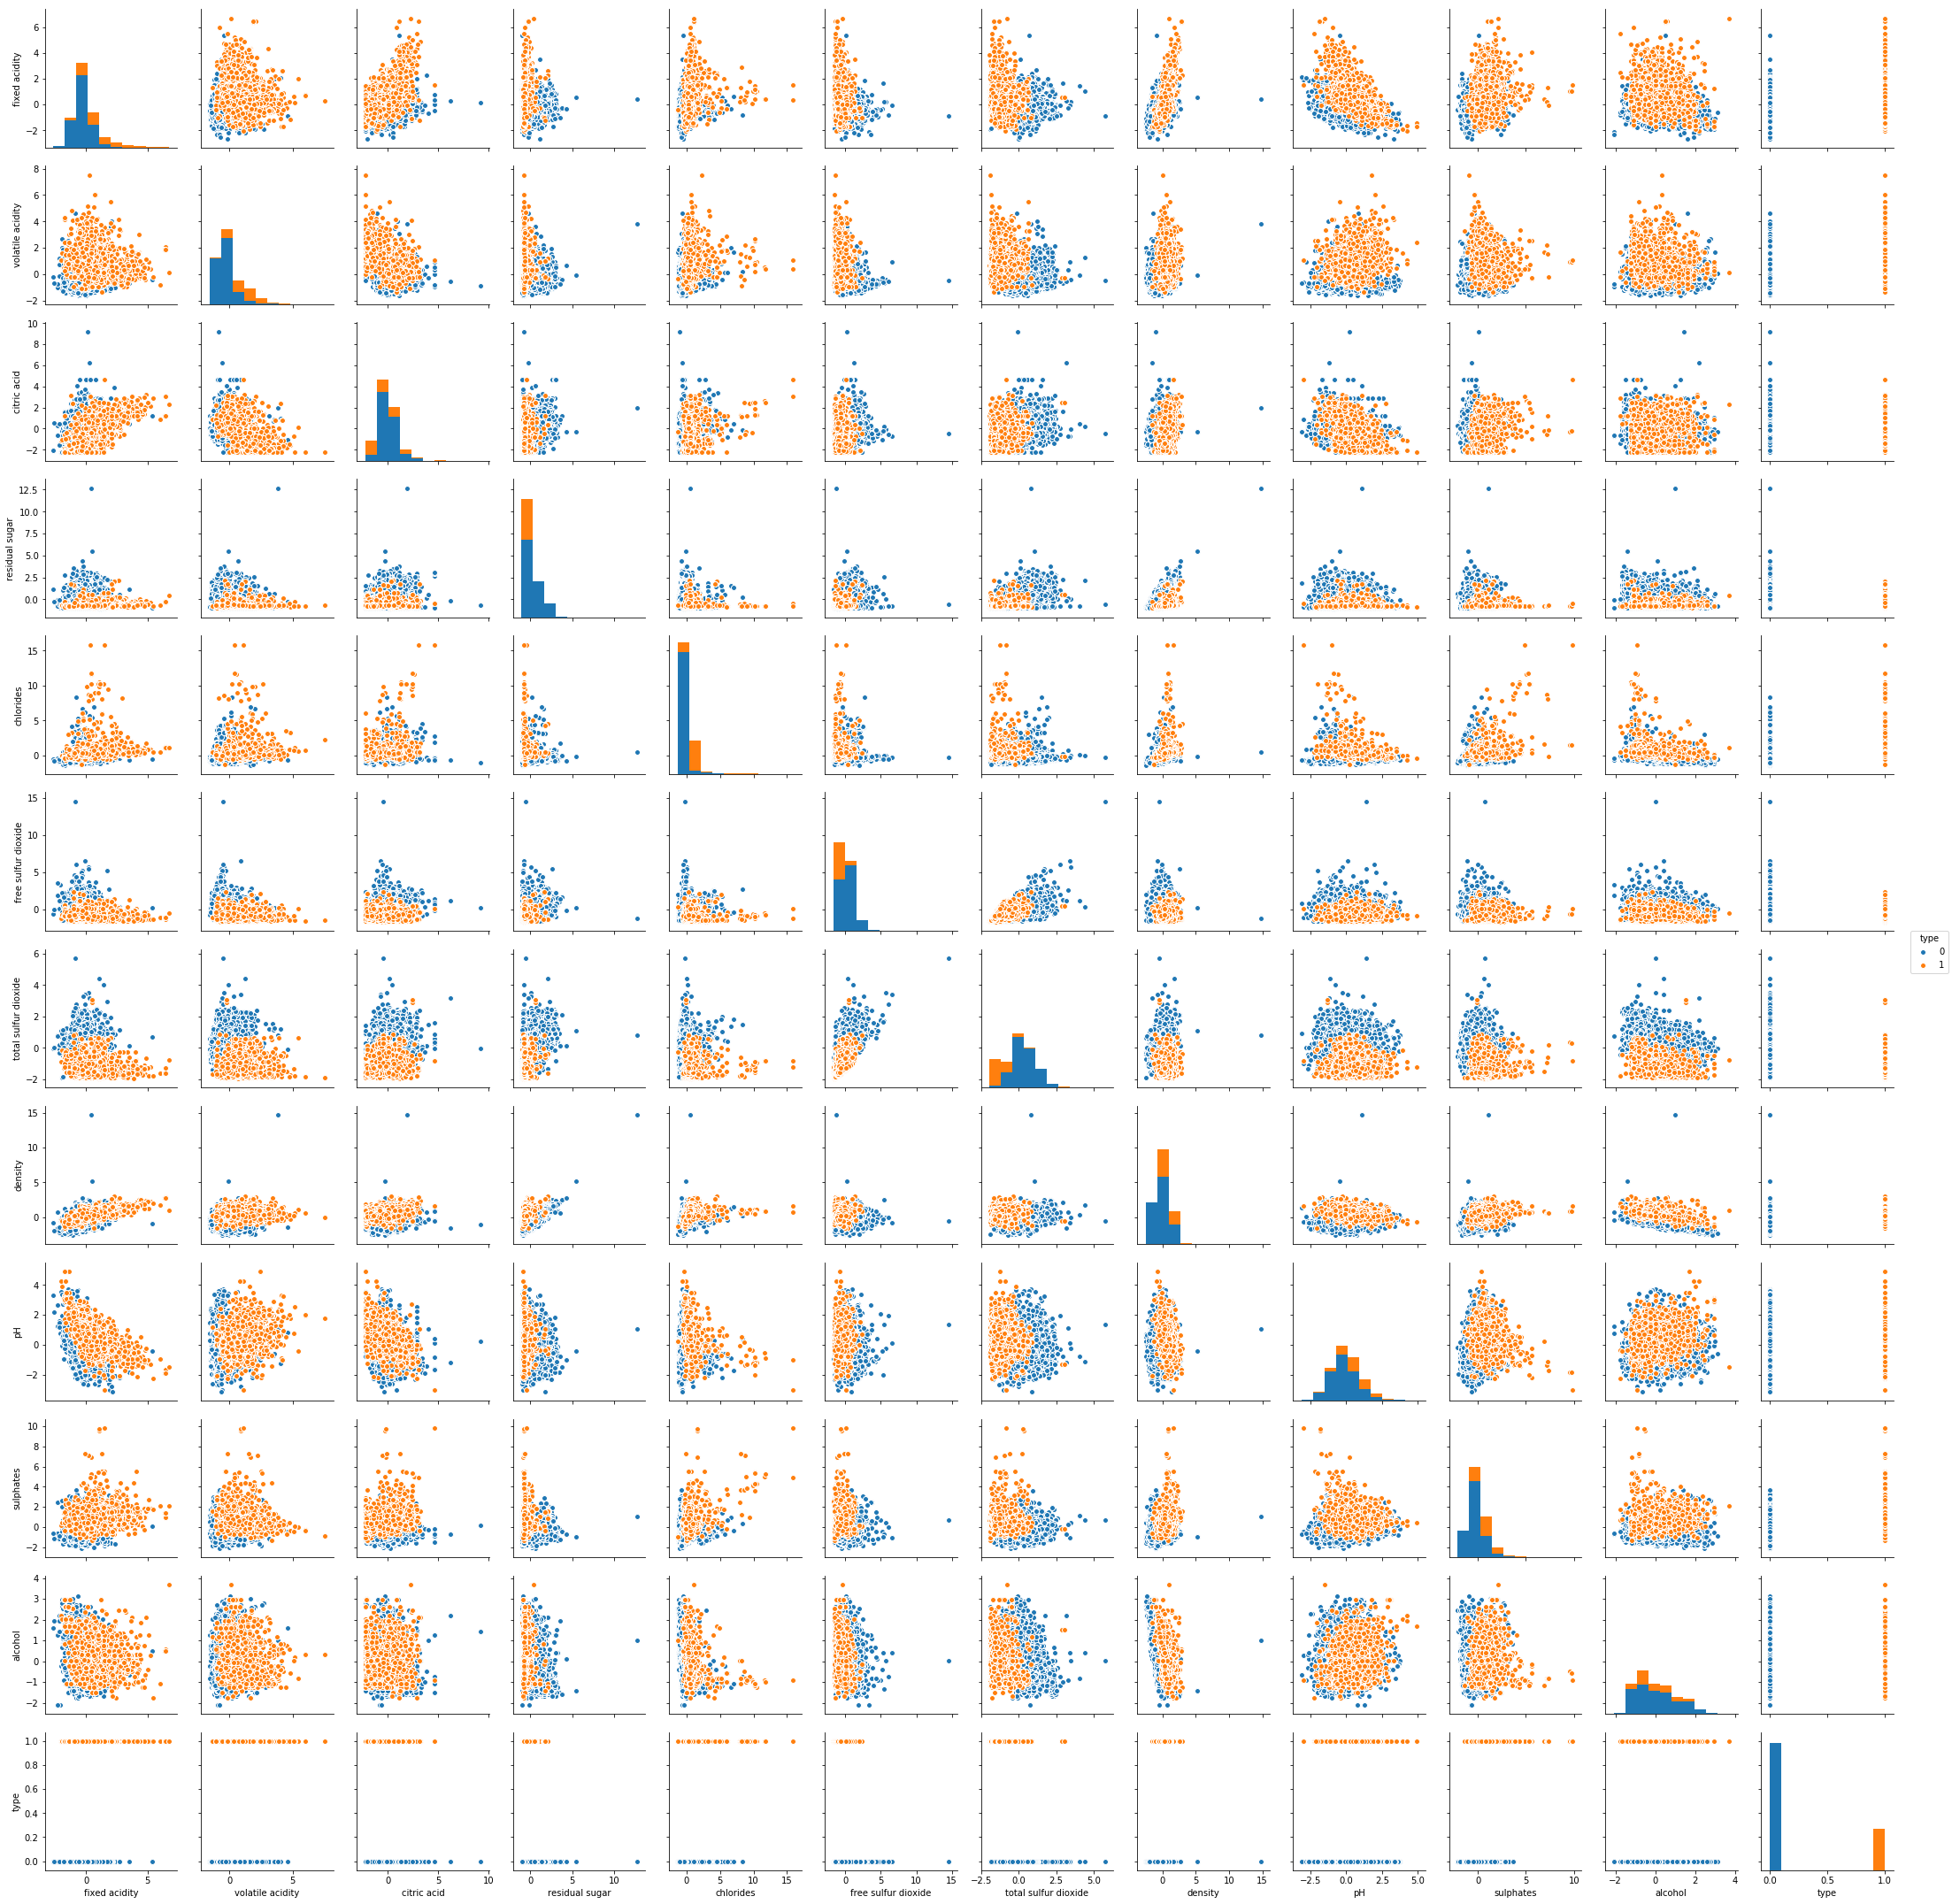

In [52]:
sns.pairplot(wpair, hue='type')

In [6]:
y = wines.type
wkm = wines.drop(['quality','type'], axis=1)
wkm = StandardScaler().fit_transform(wkm)

print(f'wines type is {type(wkm)} with shape {wkm.shape}')

wines type is <class 'numpy.ndarray'> with shape (6497, 11)


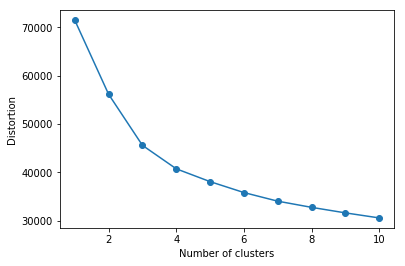

In [7]:
# Elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++',
                n_init=10, max_iter=300, random_state=0)
    km.fit(wkm)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [8]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10,
            max_iter=300, random_state=0)

y_km = km.fit_predict(wkm)

In [9]:
y_bin = np.bincount(y_km) #work to get associated value

y_bin

array([ 687, 2931, 1873, 1006], dtype=int64)

In [10]:
# look to visualize clusters compactness / separation

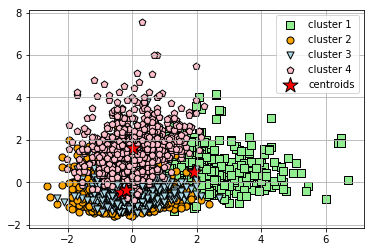

In [11]:
plt.scatter(wkm[y_km == 0,0], wkm[y_km == 0,1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='cluster 1')
plt.scatter(wkm[y_km == 1,0], wkm[y_km == 1,1], s=50, c='orange',
            marker='o', edgecolor='black', label='cluster 2')
plt.scatter(wkm[y_km == 2,0], wkm[y_km == 2,1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='cluster 3')
plt.scatter(wkm[y_km == 3,0], wkm[y_km == 3,1], s=50, c='pink',
            marker='p', edgecolor='black', label='cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

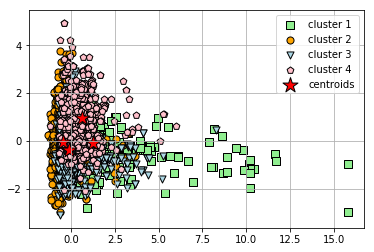

In [12]:
plt.scatter(wkm[y_km == 0,4], wkm[y_km == 0,8], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='cluster 1')
plt.scatter(wkm[y_km == 1,4], wkm[y_km == 1,8], s=50, c='orange',
            marker='o', edgecolor='black', label='cluster 2')
plt.scatter(wkm[y_km == 2,4], wkm[y_km == 2,8], s=50, c='lightblue',
            marker='v', edgecolor='black', label='cluster 3')
plt.scatter(wkm[y_km == 3,4], wkm[y_km == 3,8], s=50, c='pink',
            marker='p', edgecolor='black', label='cluster 4')

plt.scatter(km.cluster_centers_[:,4], km.cluster_centers_[:,8],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

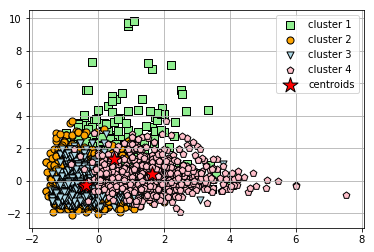

In [13]:
plt.scatter(wkm[y_km == 0,1], wkm[y_km == 0,9], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='cluster 1')
plt.scatter(wkm[y_km == 1,1], wkm[y_km == 1,9], s=50, c='orange',
            marker='o', edgecolor='black', label='cluster 2')
plt.scatter(wkm[y_km == 2,1], wkm[y_km == 2,9], s=50, c='lightblue',
            marker='v', edgecolor='black', label='cluster 3')
plt.scatter(wkm[y_km == 3,1], wkm[y_km == 3,9], s=50, c='pink',
            marker='p', edgecolor='black', label='cluster 4')

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,9],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

In [14]:
# we see that simply visualizing scaled params is ineffective
# Use PCA to solve this problem

## PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [17]:
pca = PCA(n_components=2)

wpca = pca.fit_transform(wkm)
wpca = pd.DataFrame(data = wpca, columns = ['pc1', 'pc2'])
wpca = pd.concat([wpca, wines['type']], axis=1)

wpca.head()

,pc1,pc2,type
0,-3.205996,0.416523,1
1,-3.039051,1.107462,1
2,-3.071893,0.878964,1
3,-1.571262,2.112545,1
4,-3.205996,0.416523,1


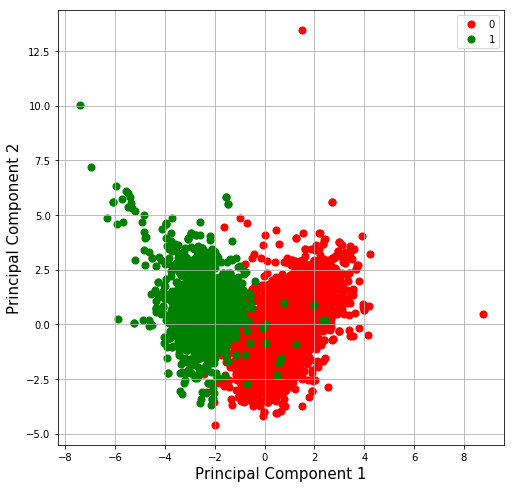

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices = wpca['type'] == target
    ax.scatter(wpca.loc[indices, 'pc1']
               , wpca.loc[indices, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
evr = pca.explained_variance_ratio_

evr

print(f'PC1 & PC2 explains {round((evr[0] + evr[1])*100,2)}% of the variance')

PC1 & PC2 explains 50.22% of the variance


In [48]:
pca.explained_variance_ratio_

array([0.2754426 , 0.22671146])

In [32]:
new_pca = PCA(n_components=11)

new_wpca = new_pca.fit_transform(wkm)
new_wpca = pd.DataFrame(data = new_wpca,
                        columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6',
                                   'pc7', 'pc8','pc9','pc10','pc11'])

print (f'New PCA Variance: {new_pca.explained_variance_ratio_}')
# THIS EXPLAINS DIMINISHING VARIANCE EXPLANATION, NOT EFFECT OF ORIGINAL VARIABLES

new_wpca.head()

New PCA Variance: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,1.655121,0.059559,-0.514603,-0.429129,-0.268149,-0.015471
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0.848374,0.167670,-0.420952,-0.271032,-0.086832,0.054146
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,-0.713308,-0.851217,-0.929669,0.549410,0.116660,-0.103745
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460


## Hierarchical Clustering

In [20]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as shc

In [21]:
row_clusters = linkage(wines.iloc[:,:-2], method='average', metric='euclidean')
whc = pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2',
                    'distance', '# of items in cluster'],
                    index=['cluster %d' % (i+1) for i in range(
                    row_clusters.shape[0])])
whc.head()

,row label 1,row label 2,distance,# of items in cluster
cluster 1,0.0,4.0,0.0,2.0
cluster 2,787.0,788.0,0.0,2.0
cluster 3,422.0,424.0,0.0,2.0
cluster 4,4525.0,4530.0,0.0,2.0
cluster 5,135.0,140.0,0.0,2.0


In [22]:
len(whc['# of items in cluster'].unique())
# we see a huge number of clusters; will have to investigate

196

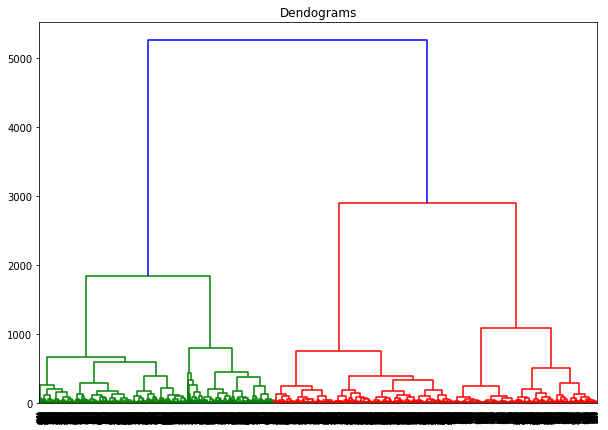

In [23]:
plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(wines.iloc[:,:-2], method='ward'))

## Agglo Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
wac = AgglomerativeClustering(n_clusters=2,
                              affinity='euclidean',
                              linkage='complete')
labels = wac.fit_predict(wines.iloc[:,:-2])
print('First ten cluster labels: %s' % labels[:10])

First ten cluster labels: [1 1 1 1 1 1 1 1 1 1]


In [26]:
unique, counts = np.unique(labels, return_counts=True)

print (np.asarray((unique, counts)).T)
# we see poor clustering 

[[   0  107]
 [   1 6390]]
